Reading Ingredients dataset
	 Number of Ingredients :  3500
	Number of Ingredients after processing:  3464
Reading Recipe dataset
	Attributes of the dataset:  Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')
	Number of records in the dataset 20111
	Duplicate titles:  2336

Description of nutrients
                fat      calories        sodium        protein
count  1.404000e+04  1.404000e+04  1.404000e+04   14040.000000
mean   3.734793e+02  6.828955e+03  6.778545e+03      94.723006
std    2.166725e+04  3.808970e+05  3.540896e+05    3565.098714
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000
25%    9.000000e+00  2.090000e+02  9.300000e+01       3.000000
50%    1.800000e+01  3.520000e+02  3.120000e+02       9.000000
75%    3.500000e+01  6.060000e+02  7.420000e+02      29.000000
max    1.722763e+06  3.011122e+07  2.767511e+07  236489.000000

Processing the dataset...
	

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(17737, 13)
Saving the processed dataset


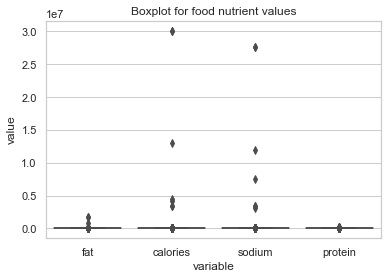

In [123]:
%run -i "preprocess_data.py"

In [124]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [125]:
data = pd.read_csv('processed_data.csv')
print(data.shape)
data.head()

(17737, 13)


,directions,fat,categories,calories,desc,protein,title,ingredients,sodium,ingredients_list,ingredients_count,ingredients_doc,ingredients_stem
0,"['1. Place the stock, lentils, celery, carrot,...",7.0,"['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...",426.0,NaN,30.0,"Lentil, Apple, and Turkey Wrap",['4 cups low-sodium vegetable or chicken stock...,559.0,"['extra-virgin olive oil', 'flour tortillas', ...",17,extra-virgin olive oil flour tortillas brown l...,extra-virgin oliv oil flour tortilla brown len...
1,['Combine first 9 ingredients in heavy medium ...,23.0,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...",403.0,This uses the same ingredients found in boudin...,18.0,Boudin Blanc Terrine with Red Onion Confit,"['1 1/2 cups whipping cream', '2 medium onions...",1439.0,"['lettuce leaves', 'dried thyme', 'eggs', 'gar...",31,lettuce leaves dried thyme eggs garlic pepper ...,lettuc leav thyme egg garlic pepper red onion ...
2,['In a large heavy saucepan cook diced fennel ...,7.0,"['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...",165.0,NaN,6.0,Potato and Fennel Soup Hodge,"['1 fennel bulb (sometimes called anise), stal...",165.0,"['chicken broth', 'fennel bulb', 'garnish', 'u...",7,chicken broth fennel bulb garnish unsalted but...,chicken broth fennel bulb garnish unsalt butte...
3,['Heat oil in heavy large skillet over medium-...,NaN,"['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,Mahi-Mahi in Tomato Olive Sauce,"['2 tablespoons extra-virgin olive oil', '1 cu...",NaN,"['extra-virgin olive oil', 'fillets', 'white b...",11,extra-virgin olive oil fillets white bread dic...,extra-virgin oliv oil fillet white bread dice ...
4,['Preheat oven to 350°F. Lightly grease 8x8x2-...,32.0,"['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...",547.0,NaN,20.0,Spinach Noodle Casserole,"['1 12-ounce package frozen spinach soufflé, t...",452.0,"['ground nutmeg', 'sour cream', 'pesto sauce',...",6,ground nutmeg sour cream pesto sauce frozen sp...,nutmeg sour cream pesto sauc frozen spinach w...



## Clustering based on similar ingredients

In [126]:
# from sklearn.feature_extraction.text import CountVectorizer

# vec = CountVectorizer()
# matrix = vec.fit_transform(data['ingredients_stem'])
# pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
# count=np.sum(matrix.toarray(),axis=0)
# item_count = dict(zip(vec.get_feature_names(), count))
# item = ([key for key,value in item_count.items() if value<5])

In [127]:
# Commented as it takes a lot of time to run
# from scipy.cluster.hierarchy import ward, dendrogram

# linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

# fig, ax = plt.subplots(figsize=(15, 20)) # set size
# ax = dendrogram(linkage_matrix, orientation="right");

# plt.tick_params(\
#     axis= 'x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')

# plt.tight_layout() #show plot with tight layout

# #uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l2') #cosine similarity
X = vec.fit_transform(data['ingredients_stem'])



In [129]:
# Analysisng terms with high tf-idf values

# print("n_samples: %d, n_features: %d" % X.shape)
# a=[]
# b=[]
# # print(pd.DataFrame(X.toarray(), columns=vec.get_feature_names())[['salt','cream','flour','chicken','eggs']].iloc[113])
# X_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
# X_df.shape[0]
# for i in range(X_df.shape[0]):
#     temp= X_df.iloc[i]
#     a.append(np.argmax(temp))
#     b.append(np.max(temp))
# df=pd.DataFrame()
# df['a']=a
# df['b']=b
# df[df['b']>0.8]['a']

In [130]:
from sklearn import metrics
from sklearn.cluster import KMeans
import random
from sklearn.metrics import silhouette_samples, silhouette_score
random.seed(1000) 
#to replicate the results
#Elbow method
distortations = {}
silhouette={}
for k in range(5,26,5):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    print("Clustering sparse data with %s" % km)
    km.fit(X)
    distortations[k] = km.inertia_
    print(km.inertia_)
    silhouette[k]=(metrics.silhouette_score(X, km.labels_, sample_size=1000))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))
    print()



Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
13902.469520660608
Silhouette Coefficient: 0.034

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
13260.656339931433
Silhouette Coefficient: 0.034

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=15, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
12841.984016079261
Silhouette Coefficient: 0.028

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_st

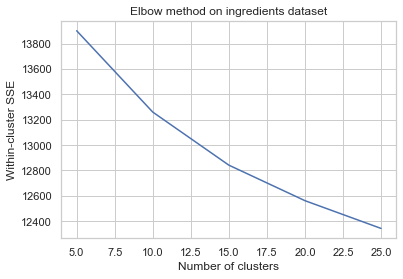

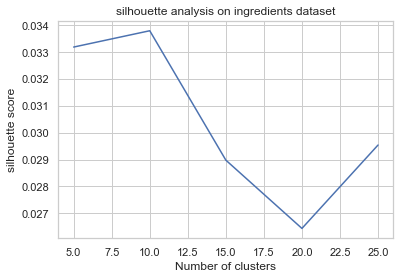

In [131]:
keys=[x for x in distortations.keys()]
values = [x for x in distortations.values()]
silhouette = [x for x in silhouette.values()]
plt.plot(keys,values)
plt.title('Elbow method on ingredients dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

plt.plot(keys,silhouette)
plt.title('silhouette analysis on ingredients dataset')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

# silhouette

In [132]:
k_cluster=15
km = KMeans(n_clusters=k_cluster, init='k-means++', max_iter=100, n_init=1)
print("Clustering sparse data with %s" % km)
km.fit(X)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=20000))
print()
print()

# print("Top terms per cluster:")
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# terms = vec.get_feature_names()
# for i in range(k_cluster):
#     print("Cluster %d:" % i, end='')
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind], end='')
#     print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=15, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
Silhouette Coefficient: 0.031




In [133]:
data['labels']=km.labels_
print("Number of items in each cluster:")
for i in range(k_cluster):
    print("Items in cluster ",i,":",len(data[data['labels']==i]))

Number of items in each cluster:
Items in cluster  0 : 1253
Items in cluster  1 : 1218
Items in cluster  2 : 949
Items in cluster  3 : 1502
Items in cluster  4 : 1362
Items in cluster  5 : 1231
Items in cluster  6 : 983
Items in cluster  7 : 648
Items in cluster  8 : 1329
Items in cluster  9 : 1589
Items in cluster  10 : 1416
Items in cluster  11 : 880
Items in cluster  12 : 1439
Items in cluster  13 : 701
Items in cluster  14 : 1237


In [134]:
data.to_csv("processed_data.csv",index=False)